In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# download dataset: "shayanfazeli/heartbeat"
path = "/ecg_data"
api.dataset_download_files("shayanfazeli/heartbeat", path=path, unzip=True)
files = os.listdir(path)
print("\nFiles in dataset:")
for file in files:
    print("  ",file)

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat

Files in dataset:
   mitbih_test.csv
   ptbdb_abnormal.csv
   ptbdb_normal.csv
   mitbih_train.csv


Training data shape = (87554, 188)
Test data shape = (21892, 188)



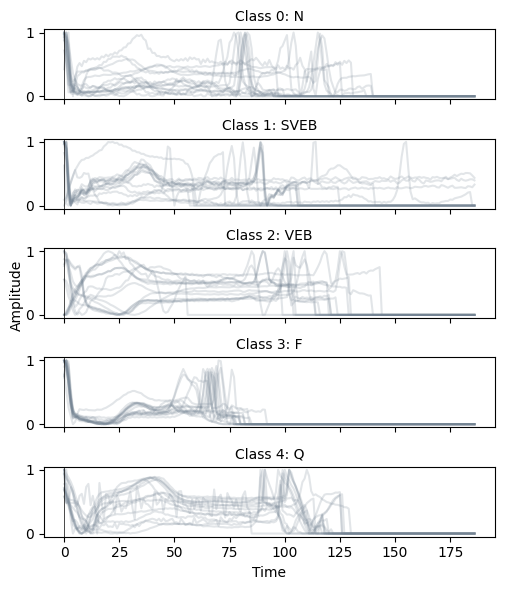

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_df(data, show=True, title=None):
    df = pd.DataFrame(data=data,
                    columns=[i for i in range(data_train.shape[1]-1)]+["class"])
    df["class"] = df["class"].astype(int)
    if show:
        print(title)
        display(df)
    return df

class_dict = {0: "N", 1: "SVEB", 2: "VEB", 3: "F", 4: "Q"}
def plot_time_series_per_class(df, plots_per_class=15, figsize=(5,6), title_fontsize=10):
    classes = set(df["class"])
    figure, axes = plt.subplots(len(classes), sharex=True, sharey=True, figsize=figsize)

    for idx, cl in enumerate(classes):
        y = df[df["class"]==cl].iloc[:plots_per_class, :-1][:plots_per_class]
        ax = axes[idx]
        ax.set_title(f"Class {cl}: {class_dict[cl]}", fontsize=title_fontsize)
        ax.plot(y.T, color="slategrey", alpha=.2)
        ax.axvline(x=0, color="black", linewidth=0.5) 
        if idx != len(classes) - 1:
            ax.tick_params(labelbottom=False) 
    figure.text(0.0, 0.5, "Amplitude", va='center', rotation='vertical', fontsize=10)
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()


data_train = np.loadtxt(os.path.join(path, "mitbih_train.csv"), delimiter=",")
data_test = np.loadtxt(os.path.join(path, "mitbih_test.csv"), delimiter=",")

print(f"Training data shape = {data_train.shape}")
print(f"Test data shape = {data_test.shape}\n")

df_train = create_df(data_train, show=False)
plot_time_series_per_class(df_train)

In [4]:
def has_trailing_zero_cols(data, step=10):
    _, cols = data.shape
    for j in range(cols - step + 1):
        sub = data[:, j:j+step]
        if np.all(sub == 0):
            print(f"col index = {j}")
            return True  # found a zero block
    return False

if not has_trailing_zero_cols(data_train):
    print("No trailing zero columns found in training data.")
    all_non_zero_rows = np.where(np.all(data_train != 0, axis=1)==True)[0]
    print(data_train[all_non_zero_rows])

No trailing zero columns found in training data.
[[0.72500002 0.77499998 0.30000001 ... 0.27500001 0.30000001 1.        ]
 [0.95477384 0.87939698 0.22613065 ... 0.3316583  0.32160804 1.        ]
 [1.         0.83950615 0.25308642 ... 0.37037036 0.33333334 1.        ]
 ...
 [1.         0.97216702 0.83499008 ... 0.02982107 0.01192843 2.        ]
 [0.73913044 0.72049689 0.63354039 ... 0.54037267 0.45962733 2.        ]
 [0.93131316 0.82626265 0.45252526 ... 0.01414141 0.02626263 3.        ]]


In [5]:
print("Training data where rows are all non-zero, head(10)")
display(df_train.iloc[all_non_zero_rows].head(10))
df_test = create_df(data_test, show=True, title="Entire test data")

Training data where rows are all non-zero, head(10)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
72565,0.725000,0.775000,0.300000,0.040000,0.085000,0.175000,0.160000,0.145000,0.205000,0.190000,...,0.300000,0.290000,0.270000,0.285000,0.310000,0.280000,0.255000,0.275000,0.300000,1
72594,0.954774,0.879397,0.226131,0.010050,0.070352,0.120603,0.115578,0.195980,0.241206,0.180905,...,0.291457,0.321608,0.331658,0.291457,0.296482,0.296482,0.316583,0.331658,0.321608,1
72601,1.000000,0.839506,0.253086,0.086420,0.179012,0.253086,0.154321,0.203704,0.216049,0.172840,...,0.364198,0.450617,0.475309,0.419753,0.413580,0.407407,0.388889,0.370370,0.333333,1
72624,0.786561,0.786561,0.264822,0.011858,0.075099,0.134387,0.126482,0.142292,0.245059,0.237154,...,0.276680,0.296443,0.300395,0.288538,0.276680,0.320158,0.339921,0.347826,0.343874,1
72690,0.869919,0.894309,0.382114,0.073171,0.097561,0.166667,0.146341,0.170732,0.223577,0.203252,...,0.329268,0.357724,0.365854,0.353659,0.337398,0.345528,0.341463,0.345528,0.361789,1
72803,1.000000,0.894180,0.306878,0.063492,0.105820,0.148148,0.132275,0.275132,0.312169,0.169312,...,0.301587,0.301587,0.259259,0.269841,0.291005,0.291005,0.253968,0.275132,0.301587,1
72872,0.745833,0.779167,0.291667,0.037500,0.070833,0.087500,0.108333,0.116667,0.191667,0.170833,...,0.241667,0.245833,0.270833,0.241667,0.237500,0.245833,0.250000,0.250000,0.287500,1
72901,0.864865,0.864865,0.328829,0.054054,0.099099,0.148649,0.144144,0.153153,0.211712,0.180180,...,0.342342,0.355856,0.328829,0.310811,0.319820,0.310811,0.333333,0.319820,0.315315,1
73040,0.777778,0.676768,0.121212,0.020202,0.136364,0.166667,0.126263,0.136364,0.237374,0.202020,...,0.303030,0.308081,0.343434,0.348485,0.323232,0.328283,0.323232,0.318182,0.333333,1
73064,1.000000,0.733645,0.130841,0.098131,0.149533,0.144860,0.210280,0.070093,0.126168,0.186916,...,0.345794,0.266355,0.331776,0.308411,0.294393,0.252336,0.271028,0.355140,0.336449,1


Entire test data


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,class
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:

# dataset from kaggle has already been pre-processed and downsampled (to 125 hz)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [11]:
def plot_loss_and_accuracy(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.plot(history.history["loss"], label="Training Loss")
    ax1.plot(history.history["val_loss"], label="Validation Loss")
    ax1.set_title("Loss over Epochs")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend()
    
    ax2.plot(history.history["accuracy"], label="Training Accuracy")
    ax2.plot(history.history["val_accuracy"], label="Validation Accuracy")
    ax2.set_title("Accuracy over Epochs")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    
    plt.tight_layout()
    plt.show()    

In [12]:
model = Sequential()

dim = len(df_train.columns)-1
p1, p2, p3, p4 = .2 ,.2, .5, .5

model.add(Input(shape=(dim, 1)))
model.add(Conv1D(filters=64, kernel_size=5, activation="relu"))
model.add(Conv1D(filters=64, kernel_size=5, activation="relu"))
model.add(Dropout(p1))

model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation="relu"))
model.add(Conv1D(filters=128, kernel_size=3, activation="relu"))
model.add(Dropout(p2))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(p3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(p4))

model.add(Dense(5, activation="softmax"))

Epoch 1/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.9153 - auc: 0.9843 - loss: 0.3121 - precision: 0.9292 - recall: 0.8948 - val_accuracy: 0.9596 - val_auc: 0.9961 - val_loss: 0.1429 - val_precision: 0.9667 - val_recall: 0.9526
Epoch 2/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step - accuracy: 0.9615 - auc: 0.9949 - loss: 0.1439 - precision: 0.9665 - recall: 0.9564 - val_accuracy: 0.9709 - val_auc: 0.9974 - val_loss: 0.1067 - val_precision: 0.9746 - val_recall: 0.9675
Epoch 3/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9706 - auc: 0.9966 - loss: 0.1098 - precision: 0.9737 - recall: 0.9672 - val_accuracy: 0.9746 - val_auc: 0.9985 - val_loss: 0.0832 - val_precision: 0.9778 - val_recall: 0.9724
Epoch 4/50
308/308 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.9746 - auc: 0.9974 - loss: 0.0925 - precision: 0.9769 - recall: 0.9722 - val_accuracy: 0.9782 - val_auc: 0.9985 - val_loss: 0.0707 - val_precision: 0.9801 - val_recall: 0.9767
Epoch 5/50
308/308 ━━━━━

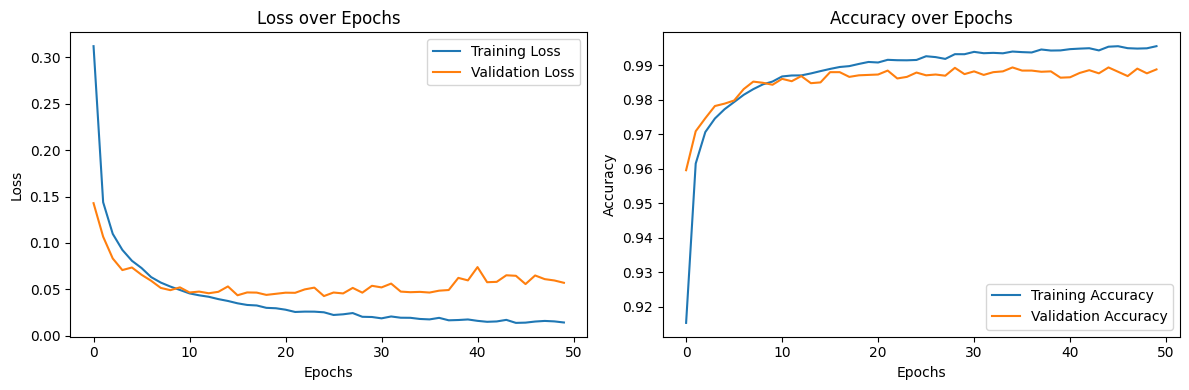

In [13]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

# train/validation split (90% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=0, stratify=y)

X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_val = X_val.reshape(-1, X_val.shape[1], 1)

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=[
                      "accuracy",
                      metrics.Precision(name="precision"),
                      metrics.Recall(name="recall"),
                      metrics.AUC(name="auc")                     
                       ])
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=50,
    batch_size=256
)

plot_loss_and_accuracy(history)

In [15]:
model.save("ecg_cnn_model.keras")

685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[18061,    34,    18,     2,     3],
       [  101,   444,    10,     0,     1],
       [   41,     1,  1385,    16,     5],
       [   28,     0,    12,   122,     0],
       [   12,     0,     3,     0,  1593]])

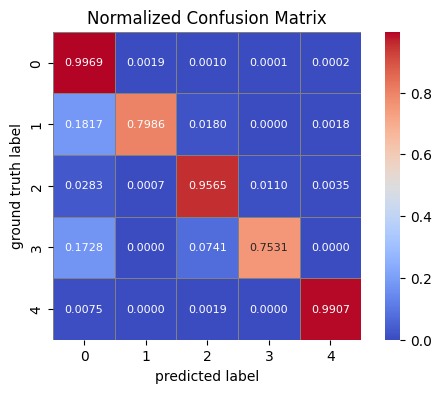

In [16]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

model = load_model("ecg_cnn_model.keras", compile=False)

X_test = df_test.iloc[:, :-1].values
X_test = X_test.reshape(-1, X_test.shape[1], 1)
y_test = df_test.iloc[:, -1].values

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
display(cm)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_norm, annot=True, fmt=".4f", cmap="coolwarm", cbar=True,
            square=True, linewidths=0.5, linecolor="gray", annot_kws={"size": 8})
plt.title("Normalized Confusion Matrix", fontsize=12)
plt.xlabel("predicted label", fontsize=10)
plt.ylabel("ground truth label", fontsize=10)
plt.show()

In [17]:
from sklearn.metrics import classification_report, accuracy_score

total_accuracy = accuracy_score(y_test, y_pred_classes)
print("Total Accuracy: ", total_accuracy, "\n")
classes = np.unique(y_test).astype(str)
report = classification_report(y_test, y_pred_classes, target_names=classes, output_dict=True)

spec = []
n_classes = len(classes)
for i in range(n_classes):
    tn = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp = np.sum(cm[:, i]) - cm[i, i]
    spec_i = tn / (tn + fp) if (tn + fp) > 0 else 0
    spec.append(spec_i)

# Print metrics for each class
print("\nClassification Metrics per Class:")
print("-" * 40)
for i, cl in enumerate(classes):
    print(f"Class {cl} ({class_dict[i]}):")
    print(f"  Precision: {report[cl]['precision']:.4f}")
    print(f"  Recall: {report[cl]['recall']:.4f}")
    print(f"  F1 Score: {report[cl]['f1-score']:.4f}")
    print(f"  Specificity: {spec[i]:.4f}")
    print()

metrics = ["recall", "specificity", "f1-score", "precision"]
for metric in metrics:
  try:
    avg = sum([report[cl][metric] for cl in classes])/n_classes
  except KeyError:
    avg = sum([spec[i] for i in range(n_classes)])/n_classes
  print(f"Average {metric}: ", avg)

Total Accuracy:  0.9868901881966015 


Classification Metrics per Class:
----------------------------------------
Class 0 (N):
  Precision: 0.9900
  Recall: 0.9969
  F1 Score: 0.9934
  Specificity: 0.9518

Class 1 (SVEB):
  Precision: 0.9269
  Recall: 0.7986
  F1 Score: 0.8580
  Specificity: 0.9984

Class 2 (VEB):
  Precision: 0.9699
  Recall: 0.9565
  F1 Score: 0.9631
  Specificity: 0.9979

Class 3 (F):
  Precision: 0.8714
  Recall: 0.7531
  F1 Score: 0.8079
  Specificity: 0.9992

Class 4 (Q):
  Precision: 0.9944
  Recall: 0.9907
  F1 Score: 0.9925
  Specificity: 0.9996

Average recall:  0.8991329765441781
Average specificity:  0.9893519061603344
Average f1-score:  0.9230023353651304
Average precision:  0.9505306452478035
